# Introduction to Decision Trees and Random Forests

## Decision Trees
A **decision tree** is a supervised learning model used for classification and regression tasks. It recursively splits the input space into regions based on feature values and makes a decision based on the majority class or average value in that region. Each internal node represents a decision based on a feature, and each leaf node represents an output.




#How Decision Trees Make Predictions in Healthcare

##1. Data Loading and Understanding

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
!curl -L -o ./diabetes-prediction-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/iammustafatz/diabetes-prediction-dataset
!unzip ./diabetes-prediction-dataset.zip

data = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows to understand the data structure
print("First 5 rows of our dataset:")
print(data.head())

# Get basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Statistical summary of the data
print("\nStatistical Summary:")
print(data.describe())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  733k  100  733k    0     0   937k      0 --:--:-- --:--:-- --:--:-- 2620k
Archive:  ./diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  
First 5 rows of our dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0       

##2. Data Preparation

In [5]:

# Separate features from target
X = data.drop('diabetes', axis=1)
y = data['diabetes']


X = X.drop('gender', axis = 1)
X = X.drop('smoking_history', axis=1)

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (100000, 6)
Target shape: (100000,)


##3. Data Splitting

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("\nTraining set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: (70000, 6)
y_train: (70000,)

Testing set shapes:
X_test: (30000, 6)
y_test: (30000,)


##4. Building and Training the Decision Tree Model

In [7]:
# Initialize the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("\nModel has been trained!")

# We can adjust hyperparameters to control tree complexity
# For example, setting max_depth to avoid overfitting
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)



Model has been trained!


DecisionTreeClassifier(max_depth=5, random_state=42)

##5. Model Visualization

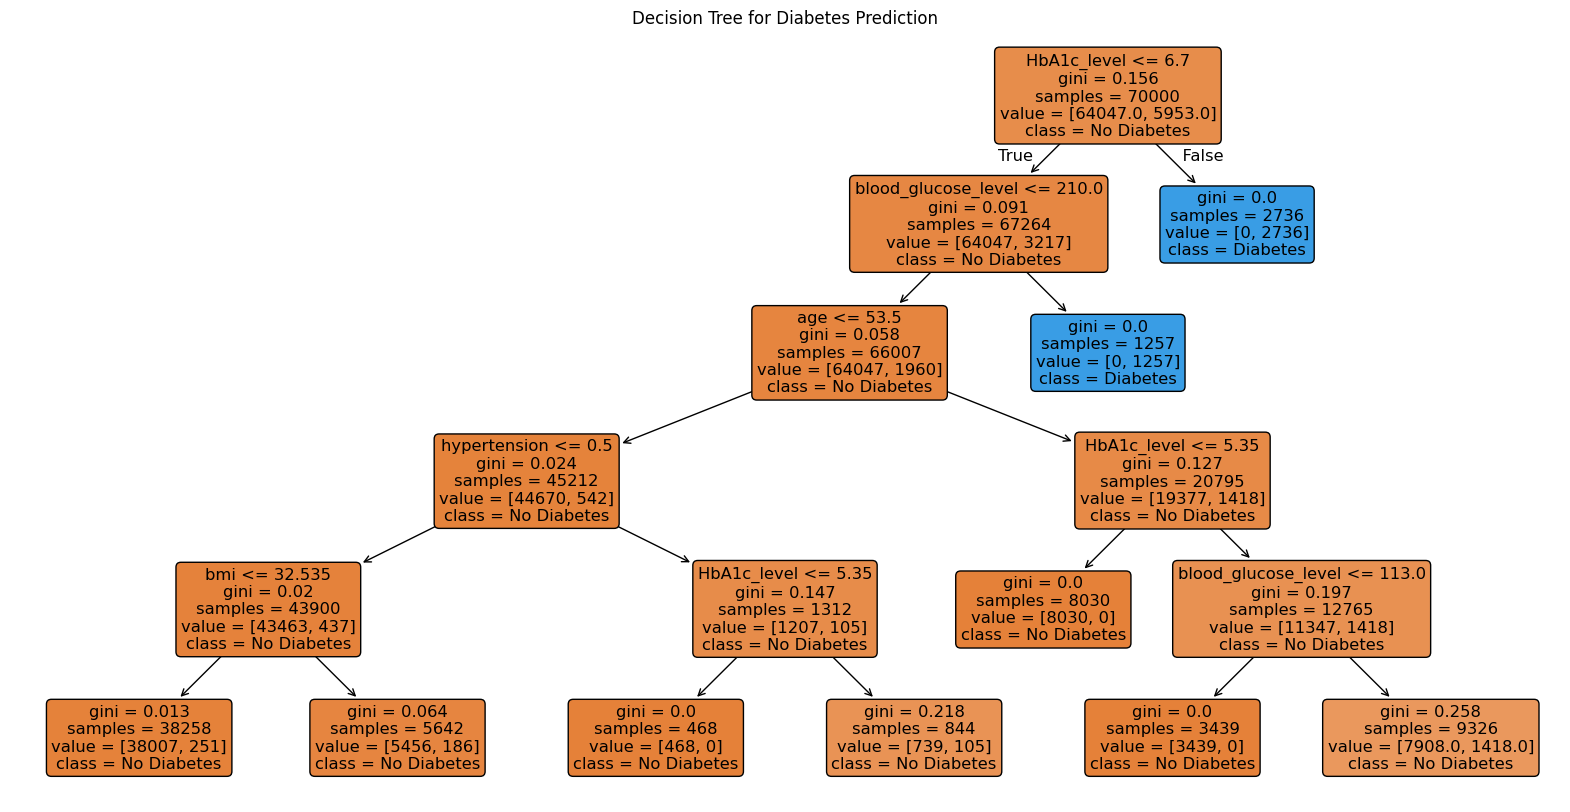

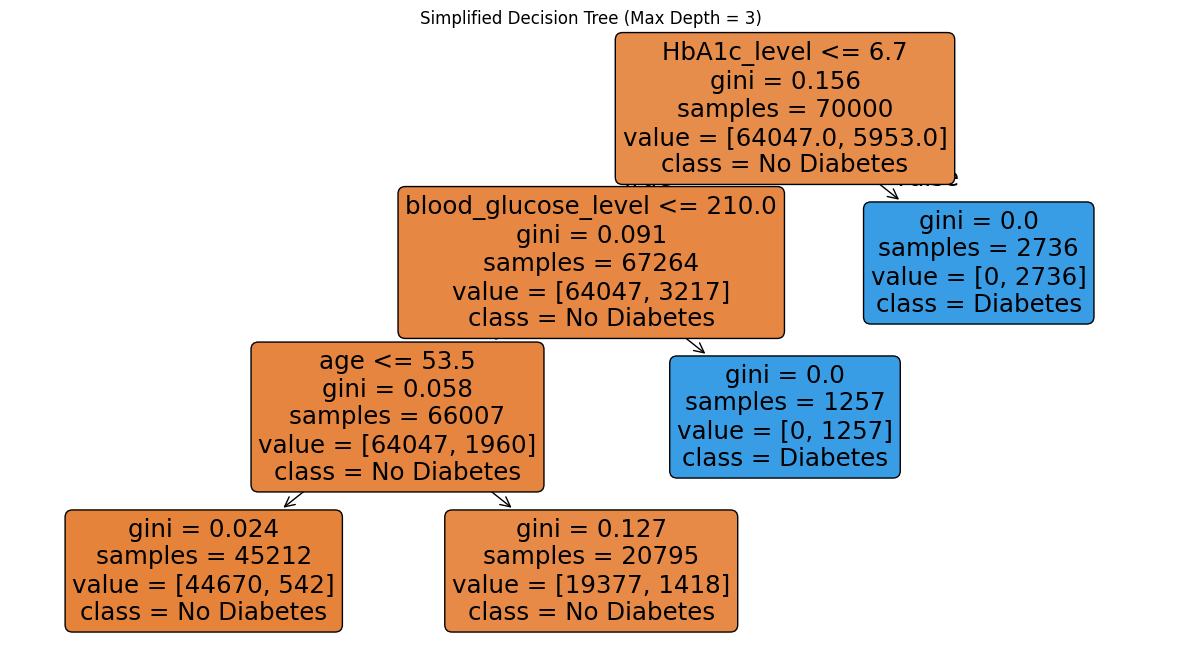

In [8]:
# Create a visualization of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          rounded=True)
plt.title('Decision Tree for Diabetes Prediction')
plt.savefig('diabetes_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# #added during screencast
# For a clearer visualization with a controlled depth
max_depth = 3
model_simple = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model_simple.fit(X_train, y_train)
plt.figure(figsize=(15, 8))
plot_tree(model_simple, filled=True, feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title(f'Simplified Decision Tree (Max Depth = {max_depth})')
plt.show()


#Evaluating Decision Tree Performance and Avoiding Overfitting

##1. Evaluating Decision Tree Performance

Initial Model Accuracy: 0.95

Confusion Matrix:
[[26764   689]
 [  683  1864]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



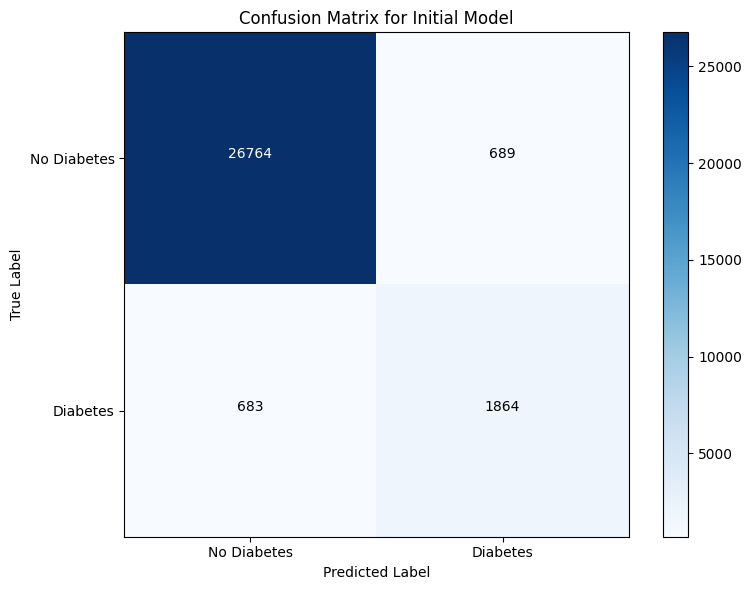

In [9]:
# Initialize and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Initial Model Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# #added during screencast
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Initial Model')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Diabetes', 'Diabetes'])
plt.yticks(tick_marks, ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the plot
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


##2. Pruning to Avoid Overfitting

Depth of the original tree: 34
Number of leaves in the original tree: 3277

Pruned Model Accuracy: 0.95

Confusion Matrix for Pruned Model:
[[27131   322]
 [ 1050  1497]]

Classification Report for Pruned Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.82      0.59      0.69      2547

    accuracy                           0.95     30000
   macro avg       0.89      0.79      0.83     30000
weighted avg       0.95      0.95      0.95     30000



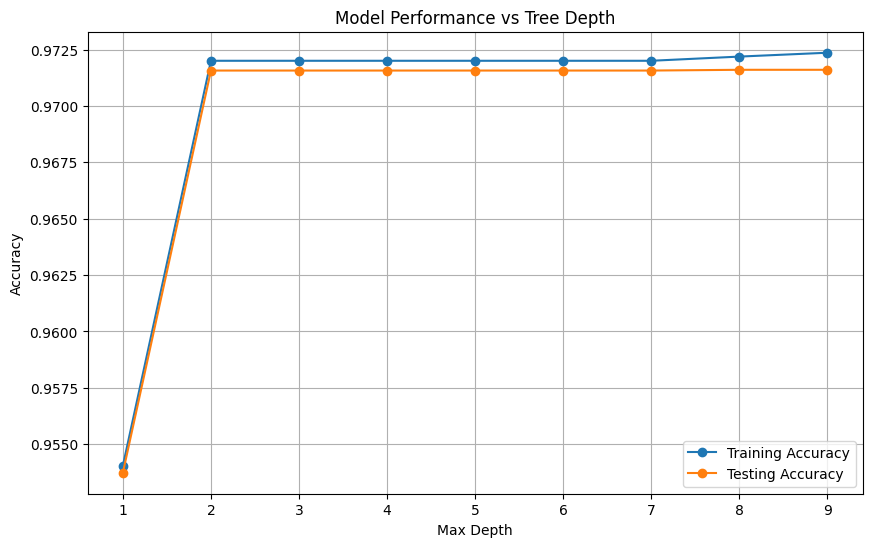

In [10]:
# Check the depth of the original tree
print(f"Depth of the original tree: {model.get_depth()}")
print(f"Number of leaves in the original tree: {model.get_n_leaves()}")

# Re-train with max_depth to prevent overfitting)
pruned_model = DecisionTreeClassifier(min_samples_leaf=1270, random_state=46)
pruned_model.fit(X_train, y_train)


# Make predictions with the pruned model
pruned_predictions = pruned_model.predict(X_test)

# Calculate accuracy for the pruned model
pruned_accuracy = accuracy_score(y_test, pruned_predictions)
print(f"\nPruned Model Accuracy: {pruned_accuracy:.2f}")

# Generate a confusion matrix for the pruned model
pruned_cm = confusion_matrix(y_test, pruned_predictions)
print("\nConfusion Matrix for Pruned Model:")
print(pruned_cm)

# Compare classification reports
print("\nClassification Report for Pruned Model:")
print(classification_report(y_test, pruned_predictions))


# Try different pruning levels to find optimal depth
max_depths = range(1, 10)
# max_depths = range(1, 1)
train_scores = []
test_scores = []

for depth in max_depths:
    temp_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_model.fit(X_train, y_train)

    # Record training and testing scores
    train_scores.append(accuracy_score(y_train, temp_model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, temp_model.predict(X_test)))


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy')
plt.plot(max_depths, test_scores, 'o-', label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


##3. Visualizing and Comparing Model Complexity

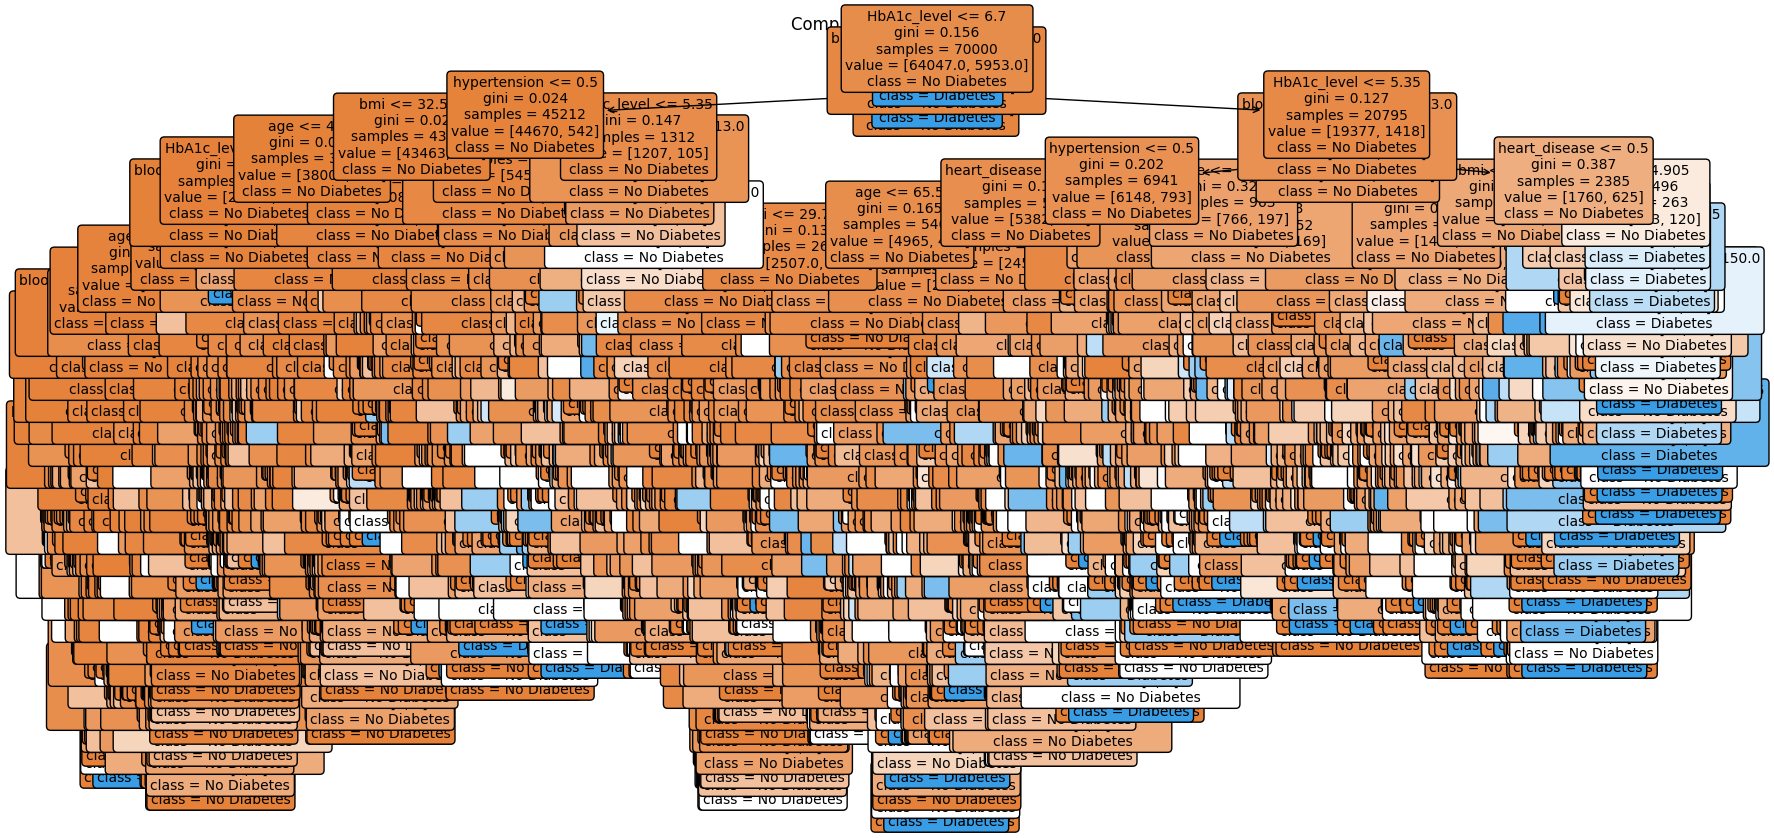

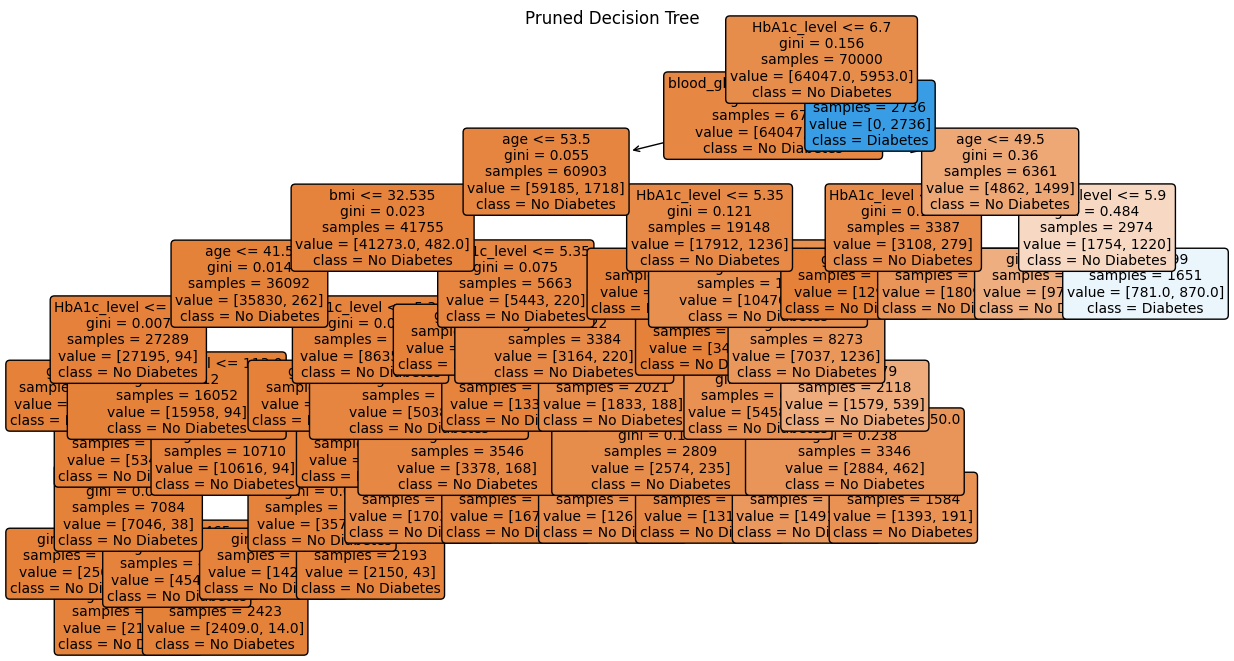

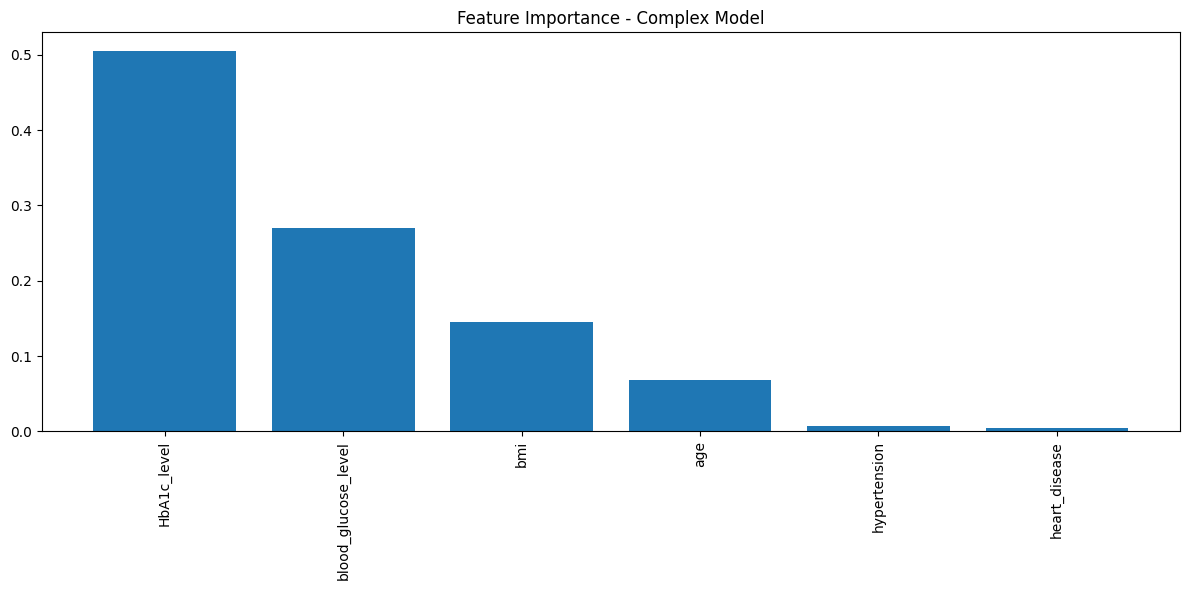

Top 5 features for Feature Importance - Complex Model:
HbA1c_level: 0.5044
blood_glucose_level: 0.2704
bmi: 0.1457
age: 0.0686
hypertension: 0.0065


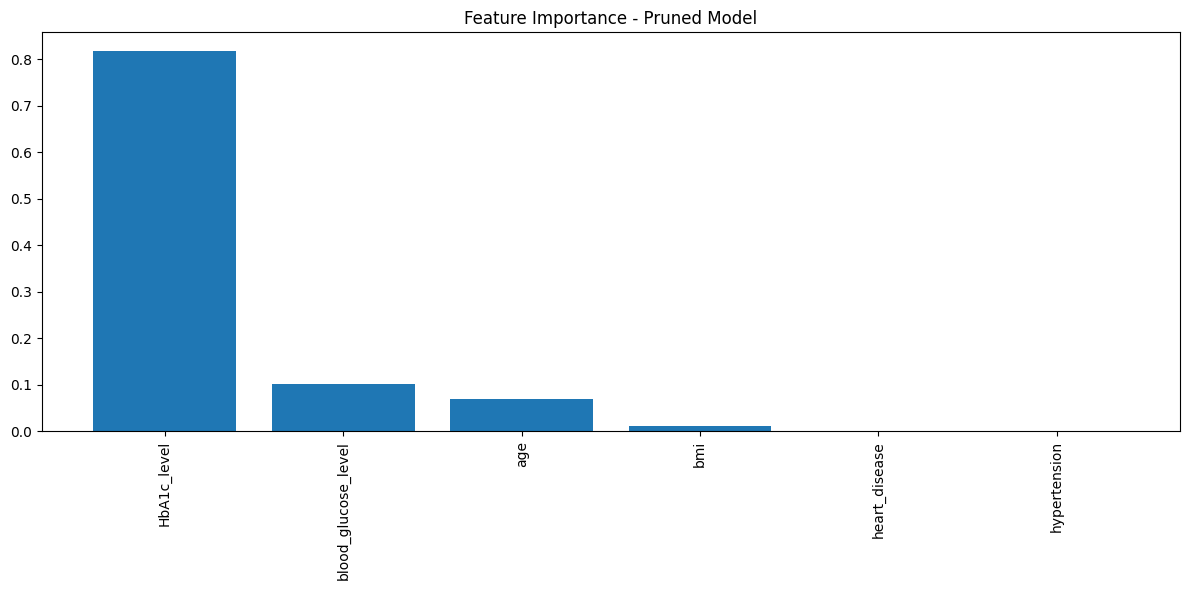

Top 5 features for Feature Importance - Pruned Model:
HbA1c_level: 0.8172
blood_glucose_level: 0.1014
age: 0.0696
bmi: 0.0119
heart_disease: 0.0000


In [11]:
# Visualize the original complex tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          rounded=True,
          fontsize=10)
plt.title('Complex Decision Tree')
plt.show()

# Visualize the pruned tree
plt.figure(figsize=(15, 8))
plot_tree(pruned_model,
          filled=True,
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          rounded=True,
          fontsize=10)
plt.title('Pruned Decision Tree')
plt.show()

# #added during screencast
# Compare feature importance between models
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    # Print top 5 features
    print(f"Top 5 features for {title}:")
    for i in range(5):
        if i < len(indices):
            print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importance for both models
plot_feature_importance(model, X.columns, "Feature Importance - Complex Model")
plot_feature_importance(pruned_model, X.columns, "Feature Importance - Pruned Model")


# Improving Model Accuracy with Random Forests

## Formula


A **random forest** is an ensemble method that combines multiple decision trees to improve predictive performance and reduce overfitting. It uses **bagging** (bootstrap aggregating) and feature randomness to create diverse trees. Each tree is trained on a random subset of the data and features.

The final prediction is made by averaging (regression) or majority voting (classification) across all trees. The random forest model reduces variance compared to a single tree, with the prediction variance approximated as:

$$ \text{Var}(\hat{f}) \approx \frac{1}{B} \text{Var}(T_b) $$

where \( B \) is the number of trees, and \( T_b \) is an individual tree's prediction.

Both methods are interpretable, handle non-linear relationships, and are widely used in machine learning tasks.

##1. Training the Random Forest Model

In [12]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42    # For reproducibility
)

# Train the model on our training data
rf_model.fit(X_train, y_train)

print("Random Forest model has been trained!")

# #added during screencast
# We can explore the parameters of Random Forest
print("\nRandom Forest Parameters:")
print(f"Number of trees (n_estimators): {rf_model.n_estimators}")
print(f"Maximum depth of trees: {'None (unlimited)' if rf_model.max_depth is None else rf_model.max_depth}")
print(f"Minimum samples to split: {rf_model.min_samples_split}")
print(f"Minimum samples per leaf: {rf_model.min_samples_leaf}")
print(f"Bootstrap samples used: {rf_model.bootstrap}")

# Check the size of the trees in the forest
n_nodes = []
max_depths = []

for tree in rf_model.estimators_:
    n_nodes.append(tree.tree_.node_count)
    max_depths.append(tree.tree_.max_depth)

print(f"\nAverage number of nodes in the trees: {np.mean(n_nodes):.1f}")
print(f"Average maximum depth of the trees: {np.mean(max_depths):.1f}")
# #added during screencast

Random Forest model has been trained!

Random Forest Parameters:
Number of trees (n_estimators): 100
Maximum depth of trees: None (unlimited)
Minimum samples to split: 2
Minimum samples per leaf: 1
Bootstrap samples used: True

Average number of nodes in the trees: 5526.5
Average maximum depth of the trees: 31.6


##2.  Making Predictions and Evaluating the Model


Random Forest Model Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.91      0.69      0.78      2547

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.88     30000
weighted avg       0.97      0.97      0.97     30000


Confusion Matrix:
[[27285   168]
 [  793  1754]]


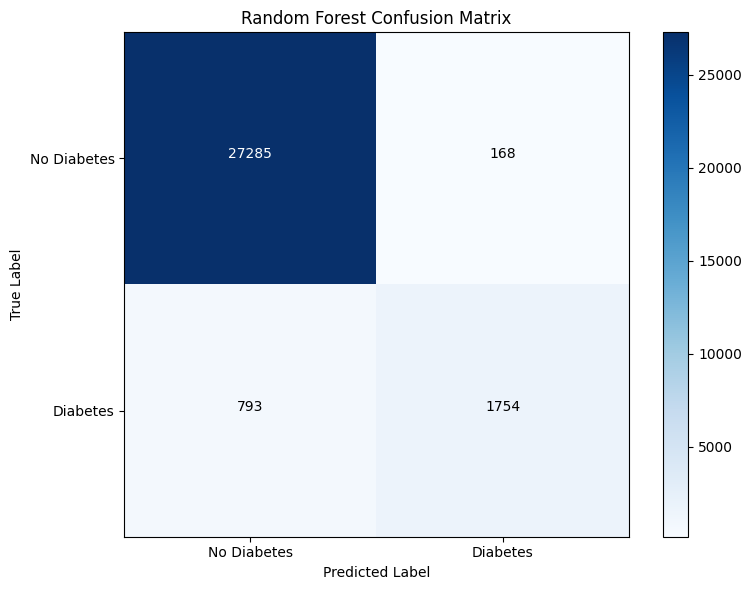


Prediction probabilities for the first 5 patients:
Patient 1: No Diabetes: 0.9700, Diabetes: 0.0300
Patient 2: No Diabetes: 1.0000, Diabetes: 0.0000
Patient 3: No Diabetes: 1.0000, Diabetes: 0.0000
Patient 4: No Diabetes: 1.0000, Diabetes: 0.0000
Patient 5: No Diabetes: 0.9200, Diabetes: 0.0800


In [13]:
# Generate predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy:.2f}")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# #added during screencast
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Diabetes', 'Diabetes'])
plt.yticks(tick_marks, ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the confusion matrix
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Get probability scores for predictions
y_proba = rf_model.predict_proba(X_test)
print("\nPrediction probabilities for the first 5 patients:")
for i in range(5):
    print(f"Patient {i+1}: No Diabetes: {y_proba[i][0]:.4f}, Diabetes: {y_proba[i][1]:.4f}")
# #added during screencast

##3. Visualizing Feature Importance

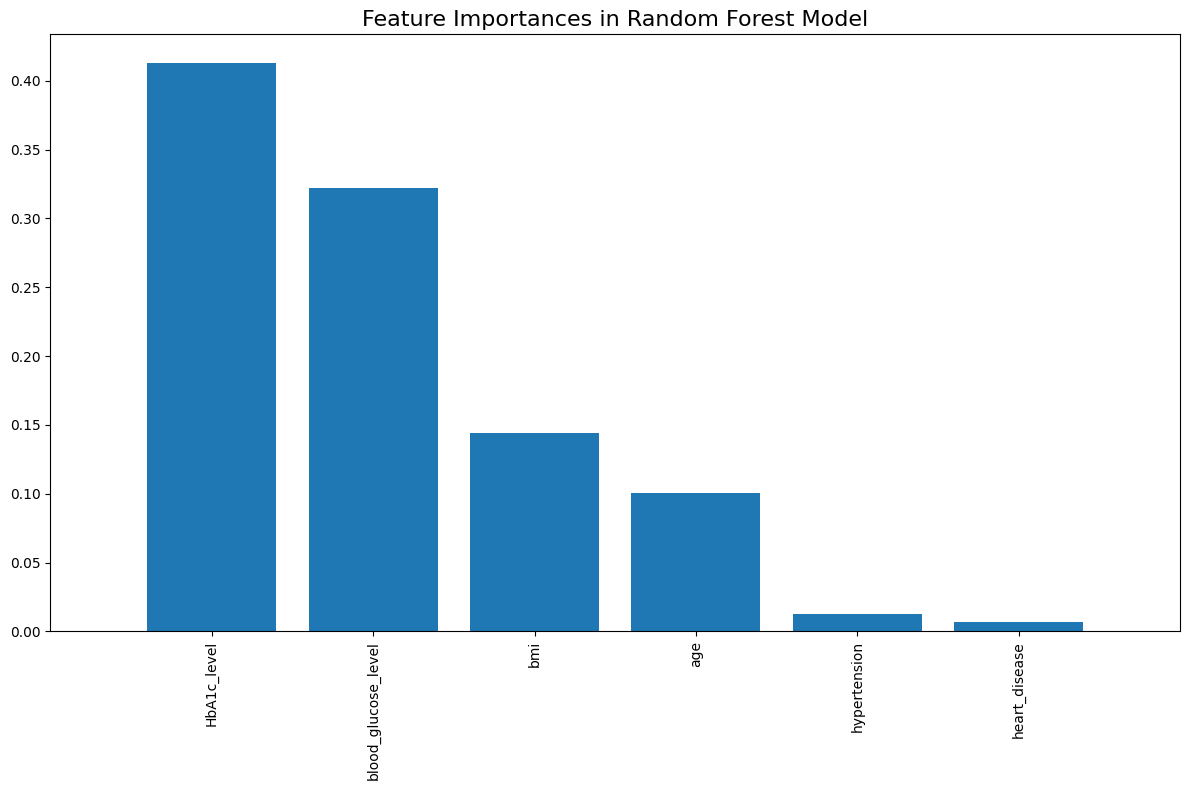


Top 5 most important features:
1. HbA1c_level: 0.4131
2. blood_glucose_level: 0.3222
3. bmi: 0.1441
4. age: 0.1008
5. hypertension: 0.0129


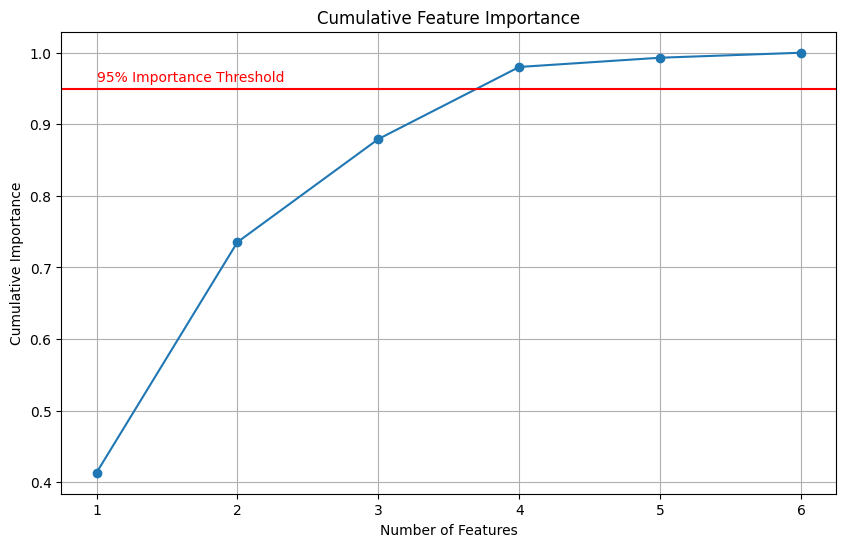


Number of features needed for 95% importance: 4 out of 6


In [14]:
# Extract feature importances from the forest
feature_importances = rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
names = [X.columns[i] for i in indices]

# Create a bar plot of feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances in Random Forest Model", fontsize=16)
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print the top 5 most important features
print("\nTop 5 most important features:")
for i in range(min(5, len(names))):
    print(f"{i+1}. {names[i]}: {feature_importances[indices[i]]:.4f}")

# We can also look at the cumulative importance
cumulative_importance = np.cumsum(feature_importances[indices])
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.96, '95% Importance Threshold', color='red')
plt.grid(True)
plt.show()

# Find how many features needed for 95% of importance
n_features_95 = np.where(cumulative_importance >= 0.95)[0][0] + 1
print(f"\nNumber of features needed for 95% importance: {n_features_95} out of {len(names)}")
# #added during screencast